In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly

In [2]:
df = pd.read_excel("Pharmacy.xlsx")

In [3]:
print(df.head())

        Date                     Drugs  Amount Payment Method Sales Person
0 2023-12-27        Aspirin, Ibuprofen    1000           Card     Nehemiah
1 2023-12-27                 Vitamin C     950           Card        Alice
2 2023-12-27    Ibuprofen, Doxycycline    1200           Cash       Esther
3 2023-12-27    Doxycycline, Vitamin C    2650           Card       Esther
4 2023-12-29  Aspirin, Calcium Tablets    1850           Card   Nurse Lami


In [4]:
print("\nMissing Values:\n", df.isnull().sum()) #to check for missing values


Missing Values:
 Date              0
Drugs             6
Amount            0
Payment Method    0
Sales Person      0
dtype: int64


In [7]:
df.dropna(subset=['Date', 'Drugs', 'Amount', 'Payment Method', 'Sales Person'], inplace=True)   #drop missing value rows

In [8]:
print("\nCleaned Data Info:\n", df.info()) # clened data

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1412
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1407 non-null   datetime64[ns]
 1   Drugs           1407 non-null   object        
 2   Amount          1407 non-null   int64         
 3   Payment Method  1407 non-null   object        
 4   Sales Person    1407 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 66.0+ KB

Cleaned Data Info:
 None


In [9]:
df.to_csv('cleaned_pharmacy_data.csv', index=False) #save as csv file

In [10]:
print("\nDataset Shape:", df.shape)  #let us get a sense of our cleaned dataframe


Dataset Shape: (1407, 5)


In [11]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 0 to 1412
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1407 non-null   datetime64[ns]
 1   Drugs           1407 non-null   object        
 2   Amount          1407 non-null   int64         
 3   Payment Method  1407 non-null   object        
 4   Sales Person    1407 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 66.0+ KB
None


In [12]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                Date       Amount
count                           1407  1407.000000
mean   2024-06-24 19:07:17.526652416  2277.761194
min              2023-12-27 00:00:00   100.000000
25%              2024-03-25 00:00:00  1300.000000
50%              2024-06-22 00:00:00  2150.000000
75%              2024-09-26 00:00:00  3250.000000
max              2024-12-31 00:00:00  4500.000000
std                              NaN  1180.608930


In [13]:
print("\nUnique Drugs:", df['Drugs'].nunique())
print("Unique Salespersons:", df['Sales Person'].nunique())


Unique Drugs: 315
Unique Salespersons: 6


In [14]:
print("\nTop 10 Most Sold Drugs:")
print(df['Drugs'].value_counts().head(10))  # to get a sense of our top most drugs sold


Top 10 Most Sold Drugs:
Drugs
Doxycycline         61
Vitamin C           58
Omega 3             58
Iron Supplements    58
Calcium Tablets     55
Ciprofloxacin       50
Paracetamol         50
Azithrimycin        45
Amoxicillin         44
ibuprofen           33
Name: count, dtype: int64


C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


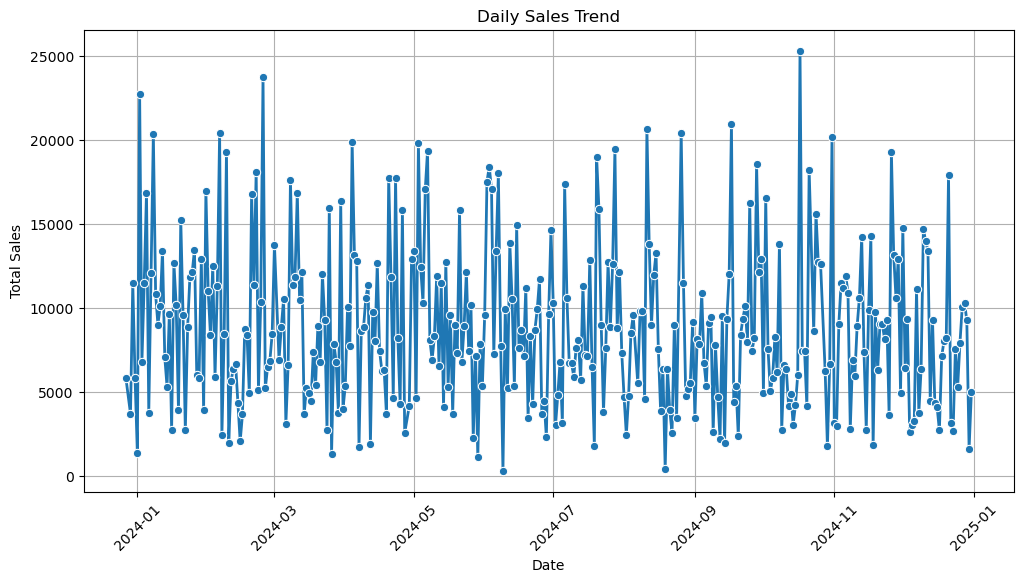

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=daily_sales, marker='o', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()   # this would give us an overview and daily trends of sales

In [16]:
# Fisrt question that needs to be answered
start_date = '01/01/2024'  
end_date = '31/12/2024'    

df['Date'] = pd.to_datetime(df['Date'])
filtered_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
total_revenue = filtered_data['Amount'].sum()

print(f"Total revenue from {start_date} to {end_date}: ${total_revenue:,.2f}")

Total revenue from 01/01/2024 to 31/12/2024: $3,178,060.00


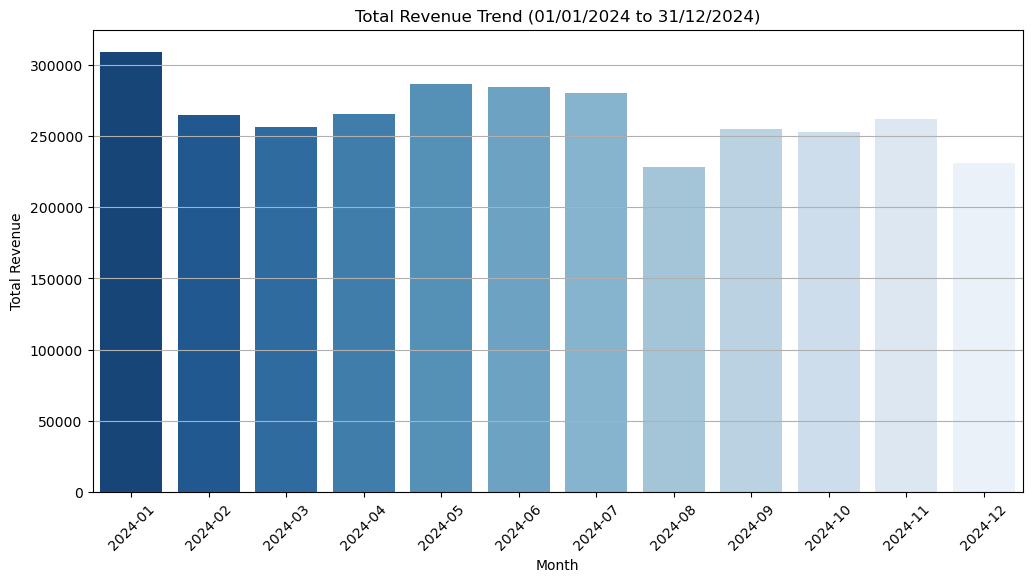

In [17]:
monthly_sales = filtered_data.groupby(filtered_data['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
# Convert period to string for plotting
monthly_sales['Date'] = monthly_sales['Date'].astype(str)
# PLOT
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Amount', data=monthly_sales, palette='Blues_r')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend ({start_date} to {end_date})')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [18]:
drug_revenue = df.groupby('Drugs')['Amount'].sum().reset_index()

# Sort by revenue in descending order
drug_revenue = drug_revenue.sort_values(by='Amount', ascending=False)

print("Top 5 Drugs by Revenue:")
print(drug_revenue.head(5))


Top 5 Drugs by Revenue:
                Drugs  Amount
202           Omega 3  145850
83    Calcium Tablets  145400
185  Iron Supplements  141900
67       Azithrimycin  103250
148       Doxycycline  101100


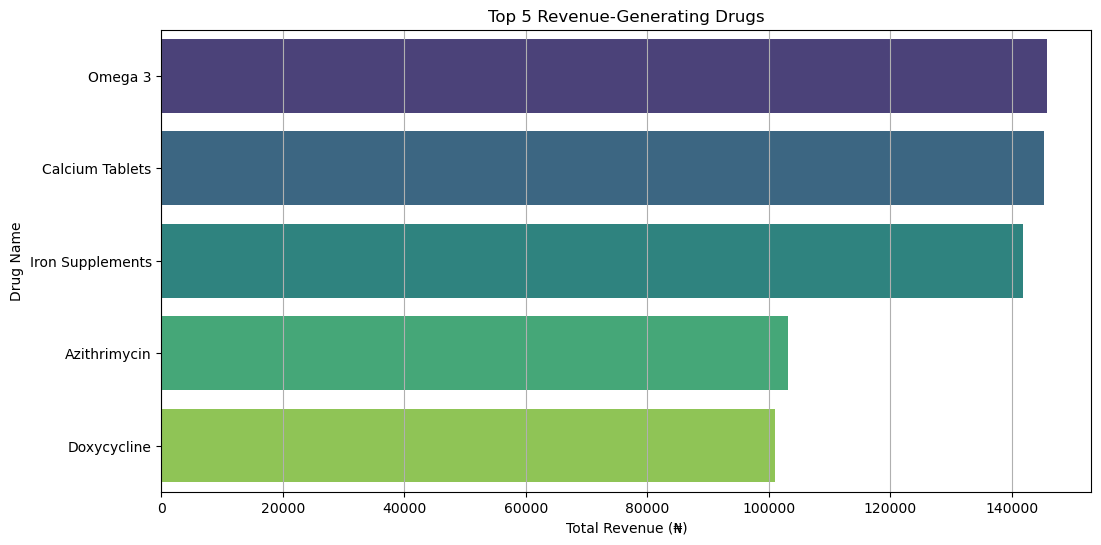

In [20]:
# let us give our result some visuals
top_5_drugs = drug_revenue.head(5)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Drugs', data=top_5_drugs, palette='viridis')
plt.xlabel('Total Revenue (₦)')
plt.ylabel('Drug Name')
plt.title('Top 5 Revenue-Generating Drugs')
plt.grid(axis='x')
plt.show()

In [6]:
# we have to group by salesperson and then sum up the revenue
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().reset_index()

# sort in descending order
salesperson_revenue = salesperson_revenue.sort_values(by='Amount', ascending=False)

# Display the top 10 salespersons
print("Top Sales persons by Revenue:")
print(salesperson_revenue.head(6))


Top Sales persons by Revenue:
  Sales Person  Amount
2     Nathniel  554000
1       Esther  544080
5        Vicki  540650
3     Nehemiah  534450
4   Nurse Lami  532030
0        Alice  515000


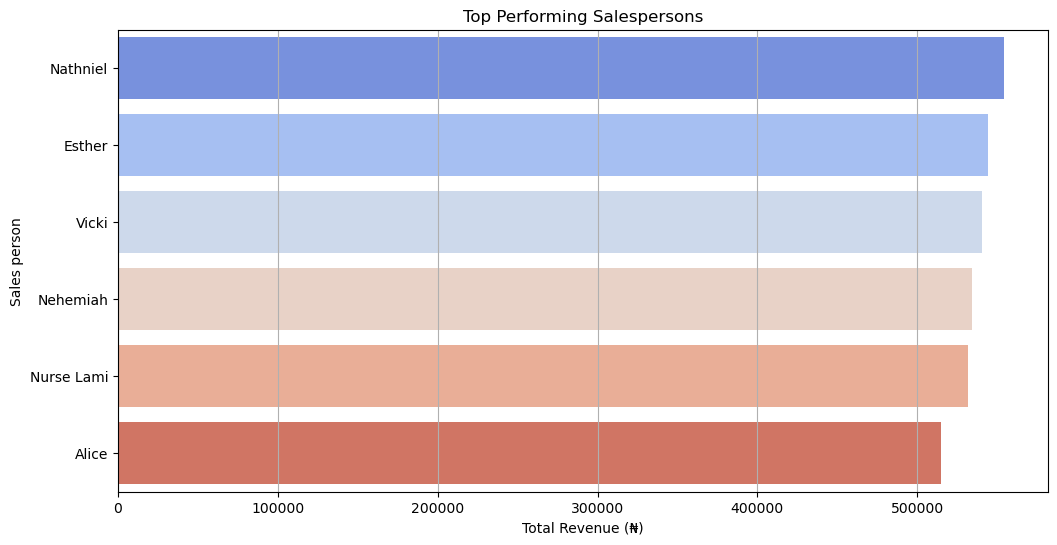

In [8]:
# visualize
top_salespersons = salesperson_revenue.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Sales Person', data=top_salespersons, palette='coolwarm') # exploring colorful palette
plt.xlabel('Total Revenue (₦)')
plt.ylabel('Sales person')
plt.title('Top Performing Salespersons')
plt.grid(axis='x')
plt.show()


In [10]:
# Ensuring date column is in date format
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and calculate total sales per day
daily_sales = df.groupby('Date')['Amount'].sum()

# Calculate average sales per day
avg_sales_per_day = daily_sales.mean()
print(f"Average Sales Per Day:₦{avg_sales_per_day:.2f}")

# Group by week and calculate total sales per week
weekly_sales = df.groupby(df['Date'].dt.to_period('W'))['Amount'].sum()

# Calculate average sales per week
avg_sales_per_week = weekly_sales.mean()
print(f"Average Sales Per Week: ₦{avg_sales_per_week:.2f}")

# Group by month and calculate total sales per month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Calculate average sales per month
avg_sales_per_month = monthly_sales.mean()
print(f"Average Sales Per Month: ₦{avg_sales_per_month:.2f}")


Average Sales Per Day:₦8846.73
Average Sales Per Week: ₦59633.52
Average Sales Per Month: ₦247708.46


C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

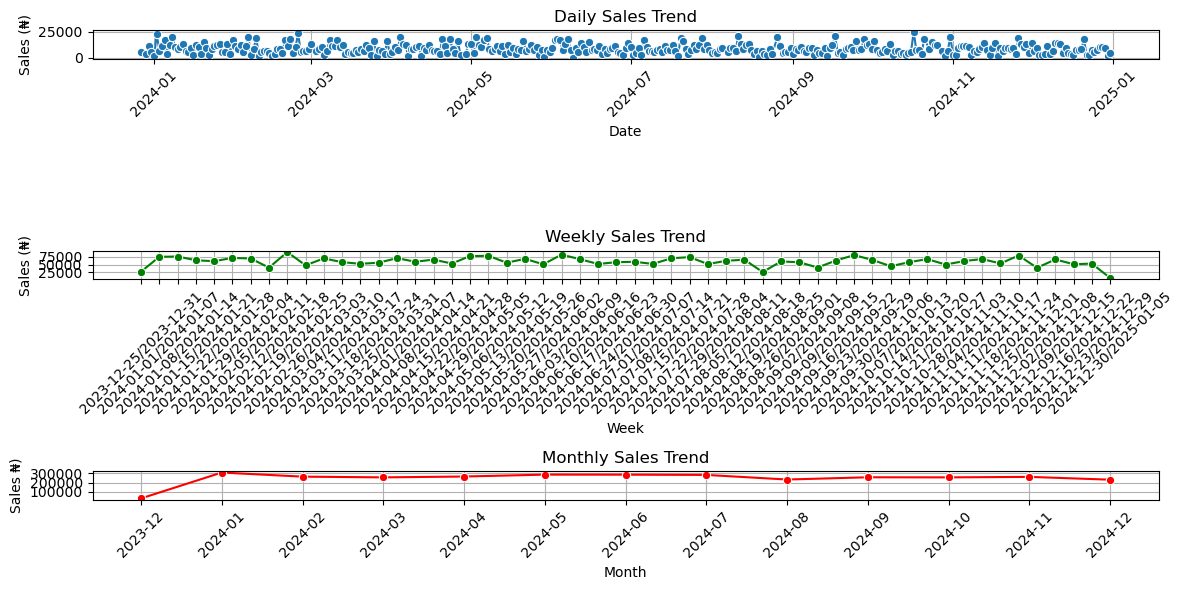

In [11]:
plt.figure(figsize=(12, 6))

# Daily Sales
plt.subplot(3, 1, 1)
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales (₦)')
plt.xticks(rotation=45)
plt.grid(True)

# Weekly Sales 
plt.subplot(3, 1, 2)
sns.lineplot(x=weekly_sales.index.astype(str), y=weekly_sales.values, marker='o', color='g')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Sales (₦)')
plt.xticks(rotation=45)
plt.grid(True)

# Monthly Sales 
plt.subplot(3, 1, 3)
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', color='r')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ₦)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
# Define the available holidays
christmas_break = ('2024-12-20', '2024-12-31')
easter_break = ('2024-03-28', '2024-04-02')
long_break = ('2024-07-27', '2024-09-08')  

# Convert dates
df['Date'] = pd.to_datetime(df['Date'])

# Function to calculate total and average sales for a given period
def analyze_sales_period(start_date, end_date, period_name):
    period_sales = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    total_sales = period_sales['Amount'].sum()
    avg_sales = period_sales['Amount'].mean()
    
    print(f"{period_name}:")
    print(f"  - Total Sales: ₦{total_sales:,.2f}")
    print(f"  - Average Sales Per Day: ₦{avg_sales:,.2f}\n")
    
    return period_sales

# Analyze each holiday period
christmas_sales = analyze_sales_period(*christmas_break, "Christmas Break")
easter_sales = analyze_sales_period(*easter_break, "Easter Break")
long_break_sales = analyze_sales_period(*long_break, "Long Break")


Christmas Break:
  - Total Sales: ₦88,850.00
  - Average Sales Per Day: ₦2,167.07

Easter Break:
  - Total Sales: ₦46,300.00
  - Average Sales Per Day: ₦2,104.55

Long Break:
  - Total Sales: ₦354,380.00
  - Average Sales Per Day: ₦2,160.85



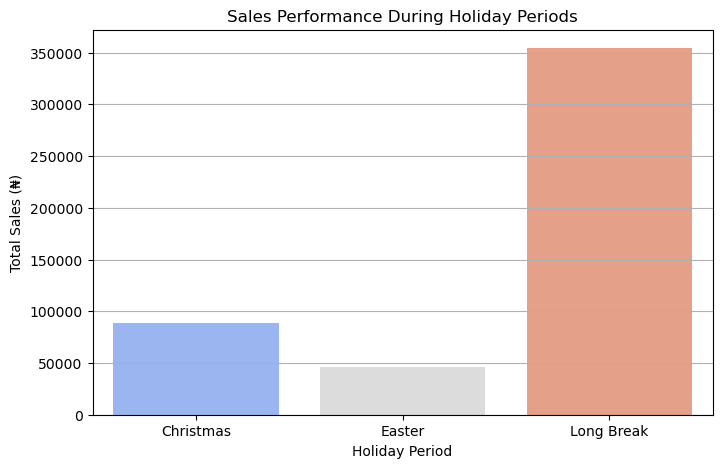

In [13]:
# visualization
holiday_sales = pd.DataFrame({
    "Holiday": ["Christmas", "Easter", "Long Break"],
    "Total Sales": [
        christmas_sales['Amount'].sum(),
        easter_sales['Amount'].sum(),
        long_break_sales['Amount'].sum()
    ]
})

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Holiday', y='Total Sales', data=holiday_sales, palette='coolwarm')
plt.xlabel('Holiday Period')
plt.ylabel('Total Sales (₦)')
plt.title('Sales Performance During Holiday Periods')
plt.grid(axis='y')
plt.show()


In [15]:
# Define holiday periods
holiday_dates = df[
    ((df['Date'] >= '2024-12-20') & (df['Date'] <= '2024-12-31')) |  # Christmas
    ((df['Date'] >= '2024-03-28') & (df['Date'] <= '2024-04-02')) |  # Easter
    ((df['Date'] >= '2024-07-27') & (df['Date'] <= '2024-09-08'))    # Long Break
]

non_holiday_dates = df[~df['Date'].isin(holiday_dates['Date'])]

# GET average daily sales
avg_sales_holidays = holiday_dates.groupby('Date')['Amount'].sum().mean()
avg_sales_non_holidays = non_holiday_dates.groupby('Date')['Amount'].sum().mean()

print(f" Average Daily Sales During Holidays: ₦{avg_sales_holidays:.2f}")
print(f" Average Daily Sales on Regular Days: ₦{avg_sales_non_holidays:.2f}")

# lets get the increase in percent
increase_percentage = ((avg_sales_holidays - avg_sales_non_holidays) / avg_sales_non_holidays) * 100
print(f" Sales Increase During Holidays: {increase_percentage:.2f}%")


 Average Daily Sales During Holidays: ₦8158.83
 Average Daily Sales on Regular Days: ₦8982.50
 Sales Increase During Holidays: -9.17%


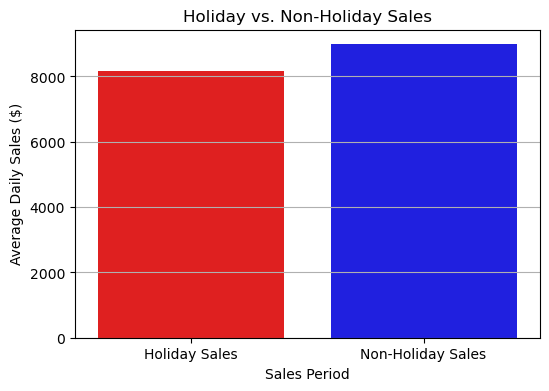

In [16]:
# VISUALIZATION TO SHOW THAT SALE DROP IN HOLIDAYS
sales_comparison = pd.DataFrame({
    "Period": ["Holiday Sales", "Non-Holiday Sales"],
    "Average Daily Sales": [avg_sales_holidays, avg_sales_non_holidays]
})

# Plot the comparison
plt.figure(figsize=(6, 4))
sns.barplot(x='Period', y='Average Daily Sales', data=sales_comparison, palette=['red', 'blue'])
plt.xlabel('Sales Period')
plt.ylabel('Average Daily Sales ($)')
plt.title('Holiday vs. Non-Holiday Sales')
plt.grid(axis='y')
plt.show()


In [19]:
# Define holiday periods
holiday_periods = {
    "Christmas": ('2024-12-20', '2024-12-31'),
    "Easter": ('2024-03-28', '2024-04-02'),
    "Long Break": ('2024-07-27', '2024-09-08')
}

for holiday, (start_date, end_date) in holiday_periods.items():
    holiday_sales = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    top_drugs = holiday_sales.groupby('Drugs')['Amount'].sum().sort_values(ascending=False).head(5)
    
    print(f"Top 5 Best-Selling Drugs During {holiday}: ")
    print(top_drugs, "\n")


Top 5 Best-Selling Drugs During Christmas: 
Drugs
Azithrimycin                 7250
Amoxicillin                  6900
Paracetamol, Azithrimycin    6550
Ciprofloxacin                5100
Omega 3, Iron Supplements    4300
Name: Amount, dtype: int64 

Top 5 Best-Selling Drugs During Easter: 
Drugs
Doxycycline                    6550
Omega 3                        4250
ibuprofen, Doxycycline         4150
Omega 3, Paracetamol           3850
Diclofenac, Calcium Tablets    3650
Name: Amount, dtype: int64 

Top 5 Best-Selling Drugs During Long Break: 
Drugs
Omega 3             20550
Paracetamol         18450
Iron Supplements    17250
Vitamin C           16850
Calcium Tablets     15050
Name: Amount, dtype: int64 



In [21]:
fastest_selling_drug = df['Drugs'].value_counts().idxmax()
fastest_selling_count = df['Drugs'].value_counts().max()

print(f"The fastest-selling drug (most frequent purchases) is {fastest_selling_drug}")


The fastest-selling drug (most frequent purchases) is Doxycycline


In [24]:
df['Date'] = pd.to_datetime(df['Date'])

df_sorted = df.sort_values(by=['Drugs', 'Date'])
df_sorted['time_diff'] = df_sorted.groupby('Drugs')['Date'].diff()

avg_time_diff = df_sorted.groupby('Drugs')['time_diff'].mean()

fastest_turnover_drug = avg_time_diff.idxmin()
fastest_turnover_time = avg_time_diff.min()

print(f"The fastest turnover drugs combined (shortest time between sales) is **{fastest_turnover_drug}**, with an average sales gap of {fastest_turnover_time}.")


The fastest turnover drugs combined (shortest time between sales) is **Aspirin, Cought Syrup**, with an average sales gap of 0 days 00:00:00.


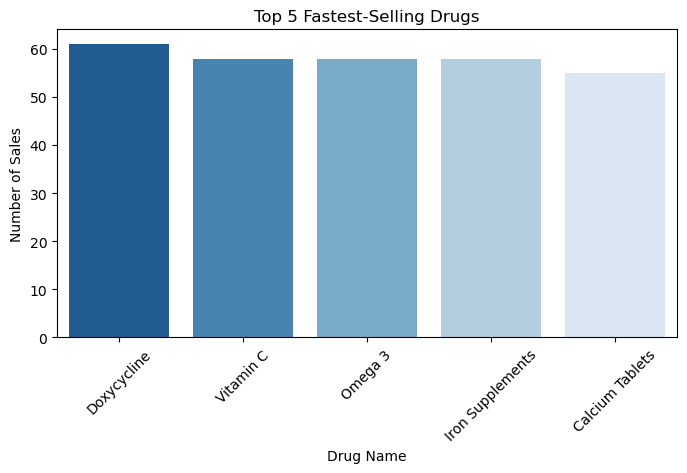

In [25]:
top_fastest_selling = df['Drugs'].value_counts().head(5)

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(x=top_fastest_selling.index, y=top_fastest_selling.values, palette="Blues_r")
plt.xlabel('Drug Name')
plt.ylabel('Number of Sales')
plt.title('Top 5 Fastest-Selling Drugs')
plt.xticks(rotation=45)
plt.show()


In [26]:
drug_sales_frequency = df['Drugs'].value_counts()

# Display top-selling drugs
print("Sales Frequency of Each Drug:")
print(drug_sales_frequency)


Sales Frequency of Each Drug:
Drugs
Doxycycline                 61
Vitamin C                   58
Omega 3                     58
Iron Supplements            58
Calcium Tablets             55
                            ..
Diclofenac, Tutolin          1
Choloroquin Injection        1
ibuprofen, Omega 3           1
Doxycycline, Amoxicillin     1
 Ciprofloxacin               1
Name: count, Length: 315, dtype: int64


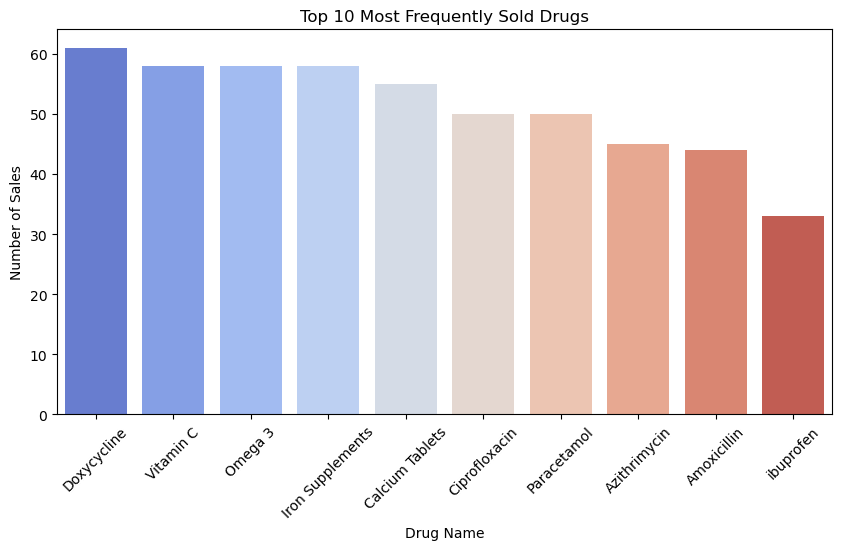

In [27]:
# Plot the frequency of top 10 most sold drugs
plt.figure(figsize=(10, 5))
sns.barplot(x=drug_sales_frequency.index[:10], y=drug_sales_frequency.values[:10], palette="coolwarm")
plt.xlabel('Drug Name')
plt.ylabel('Number of Sales')
plt.title('Top 10 Most Frequently Sold Drugs')
plt.xticks(rotation=45)
plt.show()

In [44]:
df['Drugs'] = df['Drugs'].astype(str)  # Ensure column is treated as a string
df['Drugs'] = df['Drugs'].str.split(', ')  # Split by comma and space

In [46]:
df_exploded = df.explode('Drugs', ignore_index=True)
print(df_exploded.head())  # Check 

        Date        Drugs  Amount Payment Method Sales Person  \
0 2023-12-27      Aspirin    1000           Card     Nehemiah   
1 2023-12-27    Ibuprofen    1000           Card     Nehemiah   
2 2023-12-27    Vitamin C     950           Card        Alice   
3 2023-12-27    Ibuprofen    1200           Cash       Esther   
4 2023-12-27  Doxycycline    1200           Cash       Esther   

        transaction_id  
0  2023-12-27_Nehemiah  
1  2023-12-27_Nehemiah  
2     2023-12-27_Alice  
3    2023-12-27_Esther  
4    2023-12-27_Esther  


In [50]:
basket = df_exploded.pivot_table(index='transaction_id', columns='Drugs', aggfunc='size', fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
print(basket.head())  

Drugs                      Amoxicillin   Azithrimycin   Calcium Tablets  \
transaction_id                                                            
2023-12-27_Alice       0             0              0                 0   
2023-12-27_Esther      0             0              0                 0   
2023-12-27_Nehemiah    0             0              0                 0   
2023-12-29_Nurse Lami  0             0              0                 0   
2023-12-29_Vicki       0             0              0                 0   

Drugs                   Ciprofloxacin   Doxycycline   Escitalopram oxalate  \
transaction_id                                                               
2023-12-27_Alice                    0             0                      0   
2023-12-27_Esther                   0             0                      0   
2023-12-27_Nehemiah                 0             0                      0   
2023-12-29_Nurse Lami               0             0                      0   
2023-1

C:\Users\tebrick_KING\AppData\Local\Temp\ipykernel_5548\2759956093.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [51]:
#We will use the Apriori algorithm to find frequently bought drug combinations.
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



C:\Users\tebrick_KING\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       antecedents      consequents   support  confidence      lift
0    (Amoxicillin)  (Ciprofloxacin)  0.020115    0.164062  1.173159
1  (Ciprofloxacin)    (Amoxicillin)  0.020115    0.143836  1.173159
2    (Amoxicillin)        (Omega 3)  0.022989    0.187500  1.151471
3        (Omega 3)    (Amoxicillin)  0.022989    0.141176  1.151471
4      (Vitamin C)        (Aspirin)  0.021073    0.110000  1.093714


In [32]:
top_rules = rules[['antecedents', 'consequents', 'lift']].head(10)

# Convert sets to strings for better visualization
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

heatmap_data = top_rules.pivot(index="antecedents", columns="consequents", values="lift")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Lift Score of Drugs Sold Together")
plt.xlabel("Consequents (Drugs Bought Together)")
plt.ylabel("Antecedents (Primary Drug)")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>